In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geoplot as gplt
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
# import earthpy as et
import pandas as pd
# import utm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
# import seaborn as sns

import geoplot.crs as gcrs

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 1. load distribution data

In [4]:
distros=pd.read_csv('./distribution.50km.utm.2018.11.06.txt', sep='\t')
distros

idutm  utmlong  utmlat  utmx  utmy  Anthocharis.cardamines  \
0      u100    -8.15   37.72    21    42                       0   
1     u1000     4.02   48.97   511   136                       1   
2     u1001     4.03   49.42   512   141                       0   
3     u1002     4.04   49.87   513   146                       1   
4     u1005     4.06   50.77   515   154                       1   
...     ...      ...     ...   ...   ...                     ...   
1920   u994     3.97   46.27   506   112                       0   
1921   u995     3.98   46.72   507   116                       0   
1922   u996     3.99   47.17   508   120                       0   
1923   u997     4.00   47.62   509   124                       0   
1924   u998     4.01   48.07   510   128                       1   

      Anthocharis.damone  Anthocharis.euphenoides  Anthocharis.gruneri  \
0                      0                        0                    0   
1                      0                        0                    0   
2                      0                        0                    0   
3                      0                        0                    0   
4                      0                        0                    0   
...                  ...                      ...                  ...   
1920                   0                        0                    0   
1921                   0                        0                    0   
1922                   0                        0                    0   
1923                   0                        0                    0   
1924                   0                        0                    0   

      Apatura.ilia  ...  Ypthima.asterope  Zegris.eupheme  Zerynthia.cerisyi  \
0                0  ...                 0               0                  0   
1                1  ...                 0               0                  0   
2                0  ...                 0               0                  0   
3                1  ...                 0               0                  0   
4                0  ...                 0               0                  0   
...            ...  ...               ...             ...                ...   
1920             0  ...                 0               0                  0   
1921             0  ...                 0               0                  0   
1922             0  ...                 0               0                  0   
1923             0  ...                 0               0                  0   
1924             1  ...                 0               0                  0   

      Zerynthia.cretica  Zerynthia.polyxena  Zerynthia.rumina  \
0                     0                   0                 1   
1                     0                   0                 0   
2                     0                   0                 0   
3                     0                   0                 0   
4                     0                   0                 0   
...                 ...                 ...               ...   
1920                  0                   0                 0   
1921                  0                   0                 0   
1922                  0                   0                 0   
1923                  0                   0                 0   
1924                  0                   0                 0   

      Zizeeria.knysna  Coenonympha.glycerion.new  Hipparchia.anthelea.new  \
0                   0                          0                        0   
1                   0                          1                        0   
2                   0                          0                        0   
3                   0                          0                        0   
4                   0                          0                        0   
...               ...                        ...                      ...   
1920               

epsg:3575


<AxesSubplot: >

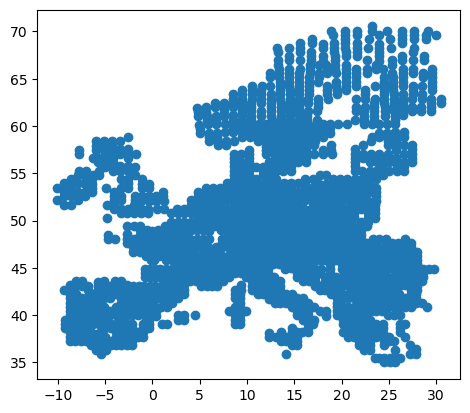

In [5]:
distros[['idutm','utmlong','utmlat','utmx','utmy']].head()

utmcoords = gpd.GeoDataFrame(distros, geometry=gpd.points_from_xy(x=distros.utmlong, y=distros.utmlat))
utmcoords = utmcoords.set_crs(epsg=3575) # https://epsg.io/25832
print(utmcoords.crs)
utmcoords.plot()

<AxesSubplot: >

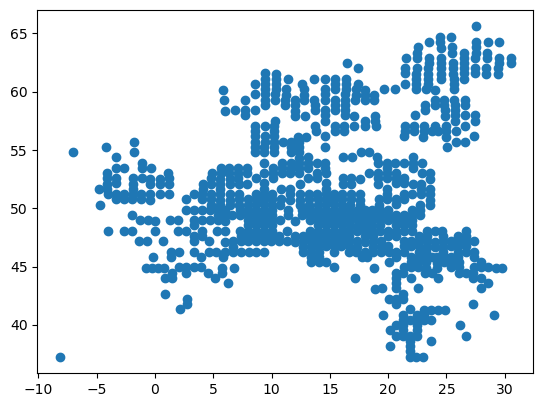

In [6]:
test=distros[distros['Pyrgus.malvae']==1][['idutm','utmlong','utmlat','utmx','utmy','Pyrgus.malvae']]

testcoords = gpd.GeoDataFrame(test, geometry=gpd.points_from_xy(x=test.utmlong, y=test.utmlat))
testcoords = testcoords.set_crs(epsg=3575) # https://epsg.io/25832
testcoords.plot()

# 2. Load species list

In [7]:
spp_list=pd.read_csv('./matching_sp_list.txt', sep='\t')
# traits: name as it appears in the trait file; map: name as it appears in the species distribution data above
spp_list#.head(5)

traits                   map
0            Aglais_io          Nymphalis.io
1       Aglais_urticae     Nymphalis.urticae
2      Agriades_aquilo       Plebejus.aquilo
3    Agriades_dardanus     Plebejus.dardanus
4     Agriades_glandon      Plebejus.glandon
..                 ...                   ...
467                NaN       Pyrgus.accretus
468                NaN  Pyrgus.trebevicensis
469                NaN      Colias.balcanica
470                NaN   Hipparchia.amalthea
471                NaN       Pyrgus.bellieri

[472 rows x 2 columns]

# 3. Upload trait data and homogenise to names in distribution maps

In [8]:
DR=pd.read_csv('./DR.txt', sep='\t', names=['traits','DR'])
bodysize=pd.read_csv('./body_size.txt', sep='\t', names=['traits','bodysize'])
cnrate=pd.read_csv('./climaticniche_rate.txt', sep='\t', names=['traits','cnrate'])
hnbreath=pd.read_csv('./habitatniche_breadth.txt', sep='\t', names=['traits','hnbreath'])
hnrate=pd.read_csv('./habitatniche_rate.txt', sep='\t', names=['traits','hnrate'])
hpnbreath=pd.read_csv('./hostplantniche_breadth.txt', sep='\t', names=['traits','hpnbreath'])
hpnrate=pd.read_csv('./hostplantniche_rate.txt', sep='\t', names=['traits','hpnrate'])
voltinism=pd.read_csv('./voltinism.txt', sep='\t', names=['traits','voltinism'])
voltinism

traits  voltinism
0           Agriades_glandon        1.0
1        Polyommatus_admetus        1.0
2        Polyommatus_fulgens        1.0
3        Polyommatus_amandus        1.0
4    Polyommatus_aroaniensis        1.0
..                       ...        ...
310           Zegris_eupheme        1.0
311         Zerynthia_cerisy        1.0
312       Zerynthia_polyxena        1.0
313         Zerynthia_rumina        1.0
314          Zizeeria_knysna        3.0

[315 rows x 2 columns]

In [9]:
for data in [DR,bodysize,cnrate,hnbreath,hnrate,hpnbreath,hpnrate,voltinism]:
    print('Unique species: ',len(data['traits'].dropna().unique()))

Unique species:  440
Unique species:  315
Unique species:  395
Unique species:  369
Unique species:  367
Unique species:  314
Unique species:  314
Unique species:  315


In [10]:
for data in [DR,bodysize,cnrate,hnbreath,hnrate,hpnbreath,hpnrate,voltinism]:
    print('Multi species: ',data.groupby('traits').nunique().describe()) # to check if there are duplicated species within trait files

Multi species:            DR
count  440.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Multi species:         bodysize
count     315.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Multi species:         cnrate
count   395.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Multi species:         hnbreath
count     369.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Multi species:         hnrate
count   367.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Multi species:         hpnbreath
count      314.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Multi species:         hpnrate
count    314.0
mean       1.0
std        0.0
min        1.0
25%

In [11]:
for data in [DR,bodysize,cnrate,hnbreath,hnrate,hpnbreath,hpnrate,voltinism]:
    print(data.describe())
    print(data.isna().describe(),'\n')

               DR
count  440.000000
mean     0.232669
std      0.262289
min      0.020248
25%      0.096297
50%      0.150532
75%      0.256142
max      1.628846
       traits     DR
count     440    440
unique      1      1
top     False  False
freq      440    440 

         bodysize
count  315.000000
mean    67.576959
std     50.316253
min      6.512701
25%     33.907595
50%     55.732389
75%     83.349585
max    357.908968
       traits bodysize
count     315      315
unique      1        1
top     False    False
freq      315      315 

            cnrate
count   395.000000
mean    393.502518
std     269.025378
min     148.308440
25%     196.912659
50%     280.334373
75%     519.626453
max    1176.661969
       traits cnrate
count     395    395
unique      1      1
top     False  False
freq      395    395 

         hnbreath
count  369.000000
mean     4.818428
std      2.282277
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max     14.000000
       trait

In [12]:
alltraits=spp_list.copy(deep=True) # to keep DR dataframe intact

for index,data in enumerate([DR,bodysize,cnrate,hnbreath,hnrate,hpnbreath,hpnrate,voltinism]):
    alltraits=alltraits.join(data.set_index('traits'), on='traits')
alltraits

traits                   map        DR   bodysize  \
0            Aglais_io          Nymphalis.io  0.068250        NaN   
1       Aglais_urticae     Nymphalis.urticae  0.129299        NaN   
2      Agriades_aquilo       Plebejus.aquilo  0.503533        NaN   
3    Agriades_dardanus     Plebejus.dardanus  0.319580        NaN   
4     Agriades_glandon      Plebejus.glandon  0.503533  18.835273   
..                 ...                   ...       ...        ...   
467                NaN       Pyrgus.accretus       NaN        NaN   
468                NaN  Pyrgus.trebevicensis       NaN        NaN   
469                NaN      Colias.balcanica       NaN        NaN   
470                NaN   Hipparchia.amalthea       NaN        NaN   
471                NaN       Pyrgus.bellieri       NaN        NaN   

          cnrate  hnbreath     hnrate  hpnbreath    hpnrate  voltinism  
0     923.218879       8.0  27.895988  26.361618  58.824002        NaN  
1    1146.304684       9.0  26.990745   7.134995  58.818775        NaN  
2     247.235513       NaN        NaN        NaN        NaN        NaN  
3     624.006240       NaN        NaN        NaN        NaN        NaN  
4     341.243191       5.0  38.393094  82.910386  69.435126        1.0  
..           ...       ...        ...        ...        ...        ...  
467          NaN       NaN        NaN        NaN        NaN        NaN  
468          NaN       NaN        NaN        NaN        NaN        NaN  
469          NaN       NaN        NaN        NaN        NaN        NaN  
470          NaN       NaN        NaN        NaN        NaN        NaN  
471          NaN       NaN        NaN        NaN        NaN        NaN  

[472 rows x 10 columns]

In [13]:
alltraits

alltraitslog10=alltraits.copy(deep=True)

for var in [x for x in ['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']]:
    alltraitslog10.loc[alltraitslog10.index,'%s_log'%(var)]=np.log10(alltraitslog10[var])
    
alltraitslog10.describe()

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


DR    bodysize       cnrate    hnbreath      hnrate  \
count  451.000000  325.000000   406.000000  379.000000  377.000000   
mean     0.231759   66.962443   391.403623    4.846966   32.657555   
std      0.259535   49.868547   267.889876    2.276591   13.665204   
min      0.020248    6.512701   148.308440    1.000000   15.749140   
25%      0.096668   33.247722   196.879374    3.000000   22.306753   
50%      0.151798   55.718241   277.440936    5.000000   28.666756   
75%      0.254291   82.733416   518.806443    6.000000   39.756393   
max      1.628846  357.908968  1176.661969   14.000000   81.108386   

        hpnbreath     hpnrate   voltinism      DR_log  bodysize_log  \
count  322.000000  322.000000  325.000000  451.000000    325.000000   
mean    19.848933   61.773728    1.333846   -0.793745      1.725992   
std     20.649530    8.110037    0.609917    0.350159      0.299461   
min      0.000000   45.575669    1.000000   -1.693616      0.813761   
25%      5.672283   57.627293    1.000000   -1.014721      1.521762   
50%     11.419650   61.045628    1.000000   -0.818735      1.745997   
75%     28.789423   67.814800    1.500000   -0.594675      1.917681   
max    103.984226   89.659052    3.000000    0.211880      2.553773   

       cnrate_log  hnbreath_log  hnrate_log  hpnbreath_log  hpnrate_log  \
count  406.000000    379.000000  377.000000     322.000000   322.000000   
mean     2.510195      0.625818    1.481878           -inf     1.787043   
std      0.256575      0.246860    0.162146            NaN     0.057466   
min      2.171166      0.000000    1.197257           -inf     1.658733   
25%      2.294200      0.477121    1.348436       0.753758     1.760628   
50%      2.443168      0.698970    1.457379       1.057653     1.785655   
75%      2.715005      0.778151    1.599407       1.459226     1.831322   
max      3.070652      1.146128    1.909066       2.016967     1.952594   

       voltinism_log  
count     325.000000  
mean        0.091699  
std         0.157887  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.176091  
max         0.477121

In [15]:
alltraitslog10.isna().describe()

traits    map     DR bodysize cnrate hnbreath hnrate hpnbreath hpnrate  \
count     472    472    472      472    472      472    472       472     472   
unique      2      2      2        2      2        2      2         2       2   
top     False  False  False    False  False    False  False     False   False   
freq      453    424    451      325    406      379    377       322     322   

       voltinism DR_log bodysize_log cnrate_log hnbreath_log hnrate_log  \
count        472    472          472        472          472        472   
unique         2      2            2          2            2          2   
top        False  False        False      False        False      False   
freq         325    451          325        406          379        377   

       hpnbreath_log hpnrate_log voltinism_log  
count            472         472           472  
unique             2           2             2  
top            False       False         False  
freq             322         322           325

# 4. map traits in Dataframe, aggregate (mean, median) and map 

In [17]:
# utmcoords['geometry']
# alltraits[alltraits['traits']=='Polyommatus_admetus']
alltraitslog10[alltraitslog10['traits']=='Aricia_cramera']

# the following is the median per species, meaning that every species is mostly zeroes. That makes the median per pixel also zero
# DRcoords[[x for x in DRcoords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].median(axis=0).describe()

traits             map        DR  bodysize      cnrate  hnbreath  \
28  Aricia_cramera  Aricia.cramera  0.220547       NaN  206.961163       6.0   

       hnrate  hpnbreath  hpnrate  voltinism    DR_log  bodysize_log  \
28  28.550711        NaN      NaN        NaN -0.656499           NaN   

    cnrate_log  hnbreath_log  hnrate_log  hpnbreath_log  hpnrate_log  \
28    2.315889      0.778151    1.455617            NaN          NaN   

    voltinism_log  
28            NaN

**First, a test**

In [18]:
utmcoords.head(5)

idutm  utmlong  utmlat  utmx  utmy  Anthocharis.cardamines  \
0   u100    -8.15   37.72    21    42                       0   
1  u1000     4.02   48.97   511   136                       1   
2  u1001     4.03   49.42   512   141                       0   
3  u1002     4.04   49.87   513   146                       1   
4  u1005     4.06   50.77   515   154                       1   

   Anthocharis.damone  Anthocharis.euphenoides  Anthocharis.gruneri  \
0                   0                        0                    0   
1                   0                        0                    0   
2                   0                        0                    0   
3                   0                        0                    0   
4                   0                        0                    0   

   Apatura.ilia  ...  Zegris.eupheme  Zerynthia.cerisyi  Zerynthia.cretica  \
0             0  ...               0                  0                  0   
1             1  ...               0                  0                  0   
2             0  ...               0                  0                  0   
3             1  ...               0                  0                  0   
4             0  ...               0                  0                  0   

   Zerynthia.polyxena  Zerynthia.rumina  Zizeeria.knysna  \
0                   0                 1                0   
1                   0                 0                0   
2                   0                 0                0   
3                   0                 0                0   
4                   0                 0                0   

   Coenonympha.glycerion.new  Hipparchia.anthelea.new  Polyommatus.eros.new  \
0                          0                        0                     0   
1                          1                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

                geometry  
0  POINT (-8.150 37.720)  
1   POINT (4.020 48.970)  
2   POINT (4.030 49.420)  
3   POINT (4.040 49.870)  
4   POINT (4.060 50.770)  

[5 rows x 429 columns]

**Create a DataFrame with means/medians across pixels from values of species present in said pixels**

In [19]:
alltraitslog10.loc[alltraitslog10[alltraitslog10['map'] == 'Cupido.decoloratus'].index,'hnbreath'].values[0]

6.0

In [21]:
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']
coords=utmcoords.copy(deep=True)

aggregate={}
for ii,trait in enumerate(names):
    coords=utmcoords.copy(deep=True) # needs to be reset for every trait for the mapping to work
    for col in [x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]:
        value = alltraitslog10[alltraitslog10['map'] == col][trait].values[0]
        valdict={1:value,0:np.nan}
        coords[col]=coords[col].map(valdict)

    aggregate['%s_mean'%(trait)]=coords[[x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].mean(axis=1)
    aggregate['%s_median'%(trait)]=coords[[x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].mean(axis=1)
print(aggregate.keys())

dict_keys(['DR_log_mean', 'DR_log_median', 'bodysize_log_mean', 'bodysize_log_median', 'cnrate_log_mean', 'cnrate_log_median', 'hnbreath_log_mean', 'hnbreath_log_median', 'hnrate_log_mean', 'hnrate_log_median', 'hpnbreath_log_mean', 'hpnbreath_log_median', 'hpnrate_log_mean', 'hpnrate_log_median', 'voltinism_log_mean', 'voltinism_log_median'])


In [24]:
aggregate['hpnrate_log_median'].min()

1.6612796567393502

In [25]:
# create a geopandas DataFrame with coordinates, geometry, and mean/medians only
aggdf=utmcoords[['idutm','utmlong','utmlat','geometry']].copy(deep=True)

for key,values in aggregate.items(): # lists stored in values should be in the same order as the original dataframe
    aggdf[key]=values
aggdf.describe()

utmlong       utmlat  DR_log_mean  DR_log_median  \
count  1925.000000  1925.000000  1925.000000    1925.000000   
mean     12.261943    50.087335    -0.873763      -0.873763   
std      10.300460     8.520188     0.104934       0.104934   
min     -10.130000    34.990000    -1.574970      -1.574970   
25%       4.790000    43.130000    -0.912402      -0.912402   
50%      13.580000    48.530000    -0.885938      -0.885938   
75%      20.710000    56.170000    -0.854907      -0.854907   
max      30.530000    70.520000     0.122816       0.122816   

       bodysize_log_mean  bodysize_log_median  cnrate_log_mean  \
count        1916.000000          1916.000000      1925.000000   
mean            1.735428             1.735428         2.663002   
std             0.089485             0.089485         0.152916   
min             0.899366             0.899366         2.189807   
25%             1.708635             1.708635         2.560991   
50%             1.733870             1.733870         2.644324   
75%             1.760935             1.760935         2.751585   
max             2.553773             2.553773         3.059300   

       cnrate_log_median  hnbreath_log_mean  hnbreath_log_median  \
count        1925.000000        1918.000000          1918.000000   
mean            2.663002           0.798976             0.798976   
std             0.152916           0.046518             0.046518   
min             2.189807           0.301030             0.301030   
25%             2.560991           0.784321             0.784321   
50%             2.644324           0.801598             0.801598   
75%             2.751585           0.818977             0.818977   
max             3.059300           1.079181             1.079181   

       hnrate_log_mean  hnrate_log_median  hpnbreath_log_mean  \
count      1918.000000        1918.000000         1923.000000   
mean          1.394330           1.394330                -inf   
std           0.042091           0.042091                 NaN   
min           1.197257           1.197257                -inf   
25%           1.375499           1.375499            1.160339   
50%           1.388566           1.388566            1.209111   
75%           1.405803           1.405803            1.251906   
max           1.660749           1.660749            1.939095   

       hpnbreath_log_median  hpnrate_log_mean  hpnrate_log_median  \
count           1923.000000       1923.000000         1923.000000   
mean                   -inf          1.783217            1.783217   
std                     NaN          0.019581            0.019581   
min                    -inf          1.661280            1.661280   
25%                1.160339          1.776761            1.776761   
50%                1.209111          1.781890            1.781890   
75%                1.251906          1.788132            1.788132   
max                1.939095          1.952594            1.952594   

       voltinism_log_mean  voltinism_log_median  
count         1916.000000           1916.000000  
mean             0.156003              0.156003  
std              0.071464              0.071464  
min              0.000000              0.000000  
25%              0.120590              0.120590  
50%              0.151379              0.151379  
75%              0.189165              0.189165  
max              0.477121              0.477121

In [37]:
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']

for var in names:
    c = np.isinf(aggdf['%s_mean'%(var)]).values.sum()
    print(var +' contains ' + str(c) + ' infinite values ')
print('\n')
for var in names:
    c = np.isinf(aggdf['%s_median'%(var)]).values.sum()
    print(var +' contains ' + str(c) + ' infinite values ')

DR_log contains 0 infinite values 
bodysize_log contains 0 infinite values 
cnrate_log contains 0 infinite values 
hnbreath_log contains 0 infinite values 
hnrate_log contains 0 infinite values 
hpnbreath_log contains 169 infinite values 
hpnrate_log contains 0 infinite values 
voltinism_log contains 0 infinite values 


DR_log contains 0 infinite values 
bodysize_log contains 0 infinite values 
cnrate_log contains 0 infinite values 
hnbreath_log contains 0 infinite values 
hnrate_log contains 0 infinite values 
hpnbreath_log contains 169 infinite values 
hpnrate_log contains 0 infinite values 
voltinism_log contains 0 infinite values 


In [44]:
from numpy import inf

# need to get rid of -inf before plotting. Could also estimate log10(x+1) for all variables

aggdf.loc[aggdf[aggdf['hpnbreath_log_mean']==-inf].index,'hpnbreath_log_mean']=np.nan
aggdf.loc[aggdf[aggdf['hpnbreath_log_median']==-inf].index,'hpnbreath_log_median']=np.nan

# x[x == -inf] = 0

In [45]:
# test
aggdf[aggdf['hpnbreath_log_median']==-inf]


Empty GeoDataFrame
Columns: [idutm, utmlong, utmlat, geometry, DR_log_mean, DR_log_median, bodysize_log_mean, bodysize_log_median, cnrate_log_mean, cnrate_log_median, hnbreath_log_mean, hnbreath_log_median, hnrate_log_mean, hnrate_log_median, hpnbreath_log_mean, hpnbreath_log_median, hpnrate_log_mean, hpnrate_log_median, voltinism_log_mean, voltinism_log_median]
Index: []

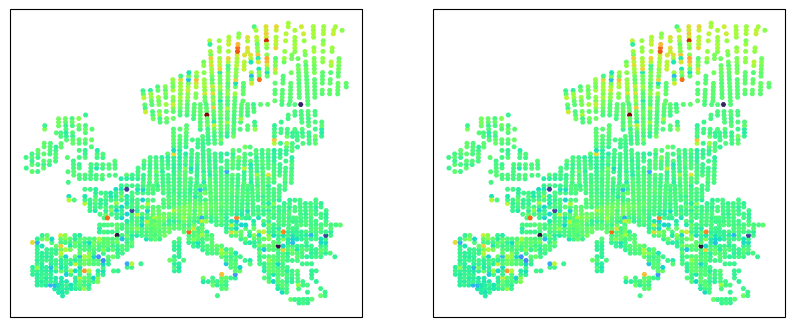

In [46]:
fig=plt.figure(figsize=(10,4),facecolor='w') #width height
outer_grid=gridspec.GridSpec(1,2, wspace=0.2, hspace=0.00) #row columns

dataDR=aggdf[['idutm','utmlong','utmlat','geometry','DR_log_mean','DR_log_median']].copy(deep=True)
cmap = mpl.cm.get_cmap('turbo')

ax1=plt.subplot(outer_grid[0,0], projection=gcrs.LambertAzimuthalEqualArea())# row column
# DRcoordmean = gpd.GeoDataFrame(dataDR, geometry=gpd.points_from_xy(x=dataDR.utmlong, y=dataDR.utmlat))
# DRcoordmean = DRcoordmean.set_crs(epsg=25832) # https://epsg.io/25832
norm = mpl.colors.Normalize(vmin=dataDR['DR_log_mean'].min(), vmax=dataDR['DR_log_mean'].max())
# DRcoordmean.plot(c=[norm(x) for x in dataDR['meanDR']], marker='H', markersize=10,ax=ax1)
ax1.scatter(x=dataDR.utmlong, y=dataDR.utmlat, c=[norm(x) for x in dataDR['DR_log_mean']],cmap = cmap, marker='H', s=8)
ax1.set_ylabel('DR_log_mean')

ax2=plt.subplot(outer_grid[0,1], projection=gcrs.LambertAzimuthalEqualArea())# row column
dataDR=aggdf[['idutm','utmlong','utmlat','geometry','DR_log_mean']].copy(deep=True)
# DRcoordmedian = gpd.GeoDataFrame(dataDR, geometry=gpd.points_from_xy(x=dataDR.utmlong, y=dataDR.utmlat))
# DRcoordmedian = DRcoordmedian.set_crs(epsg=25832) # https://epsg.io/25832
norm = mpl.colors.Normalize(vmin=dataDR['DR_log_mean'].min(), vmax=dataDR['DR_log_mean'].max())
# DRcoordmedian.plot(c=[norm(x) for x in dataDR['medianDR']], marker='H', markersize=10, ax=ax2)
ax2.scatter(x=dataDR.utmlong, y=dataDR.utmlat, c=[norm(x) for x in dataDR['DR_log_mean']],cmap = cmap, marker='H', s=8)
ax2.set_ylabel('DR_log_mean')

plt.show()

**Now, loop median and mean**

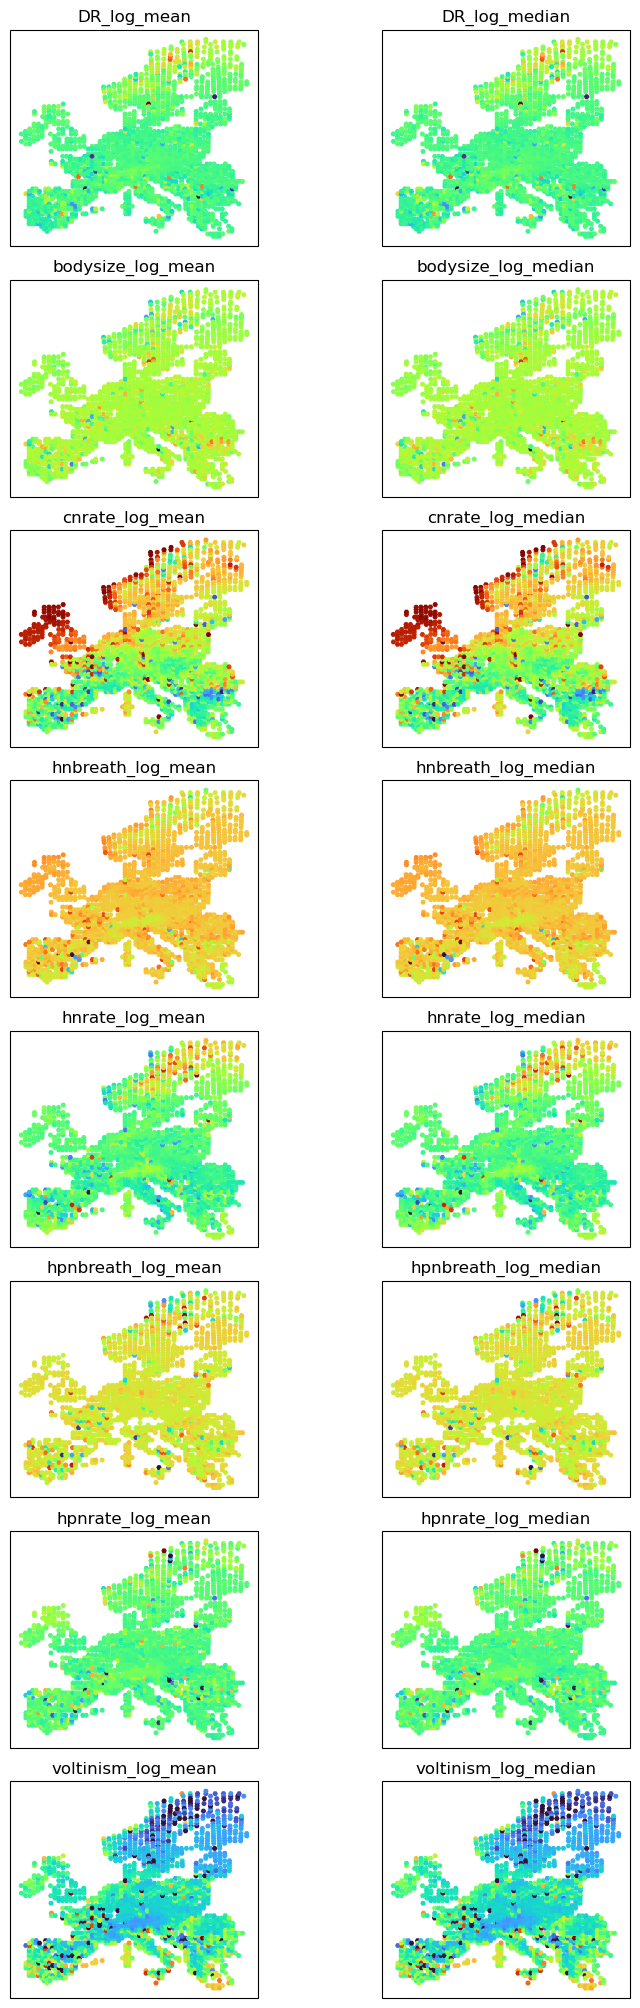

In [47]:
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']
markersize=3
cmap = mpl.cm.get_cmap('turbo')

fig=plt.figure(figsize=(8,26),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.00) #row columns

for index,trait in enumerate(names):
#     print('%s_mean'%(trait))
    ax=plt.subplot(outer_grid[index,0], projection=gcrs.LambertAzimuthalEqualArea())# row column
#     coordsmap = gpd.GeoDataFrame(aggdf['%s_mean'%(trait)], geometry=gpd.points_from_xy(x=aggdf.utmlong, y=aggdf.utmlat))
#     coordsmap = coordsmap.set_crs(epsg=25832) # https://epsg.io/25832
    norm = mpl.colors.Normalize(vmin=aggdf['%s_mean'%(trait)].min(), vmax=aggdf['%s_mean'%(trait)].max())
#     coordsmap.plot(c=[norm(x) for x in aggdf['%s_mean'%(trait)]], marker='H', markersize=markersize, ax=ax)
    ax.scatter(x=aggdf.utmlong, y=aggdf.utmlat, c=[norm(x) for x in aggdf['%s_mean'%(trait)]],cmap = cmap, marker='H', s=8)
    plt.title('%s_mean'%(trait))
    
    ax=plt.subplot(outer_grid[index,1], projection=gcrs.LambertAzimuthalEqualArea())# row column
#     print('%s_median'%(trait))
#     coordsmap = gpd.GeoDataFrame(aggdf['%s_median'%(trait)], geometry=gpd.points_from_xy(x=aggdf.utmlong, y=aggdf.utmlat))
#     coordsmap = coordsmap.set_crs(epsg=25832) # https://epsg.io/25832
    norm = mpl.colors.Normalize(vmin=aggdf['%s_median'%(trait)].min(), vmax=aggdf['%s_median'%(trait)].max())
#     coordsmap.plot(c=[norm(x) for x in aggdf['%s_median'%(trait)]], marker='H', markersize=markersize, ax=ax)
    ax.scatter(x=aggdf.utmlong, y=aggdf.utmlat, c=[norm(x) for x in aggdf['%s_median'%(trait)]],cmap = cmap, marker='H', s=8)
    plt.title('%s_median'%(trait))

plt.show()

**without normalizing the colours**

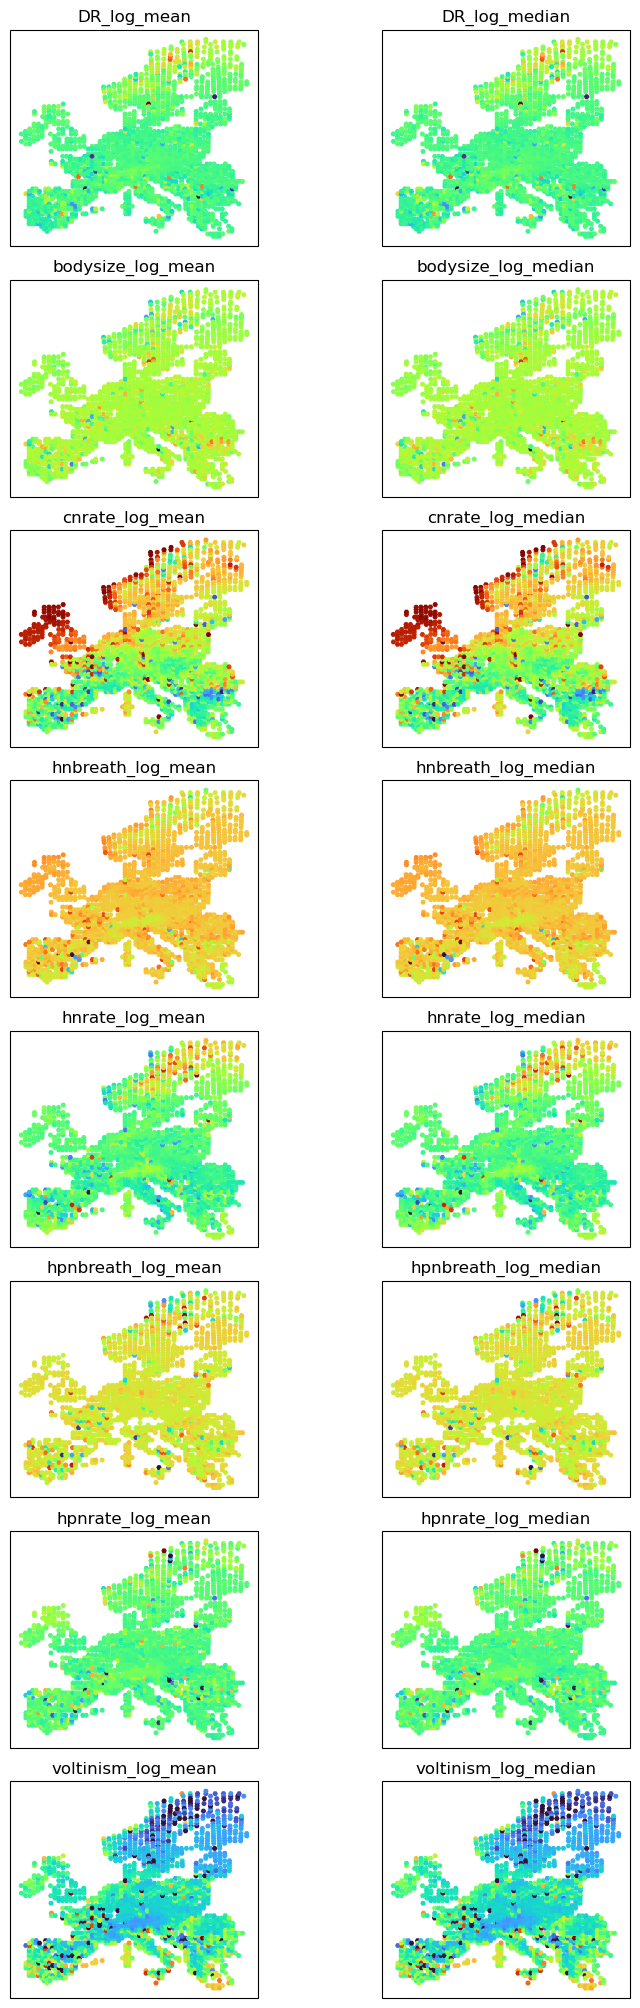

In [48]:
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']
markersize=3
cmap = mpl.cm.get_cmap('turbo')

fig=plt.figure(figsize=(8,26),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.00) #row columns

for index,trait in enumerate(names):
#     print('%s_mean'%(trait))
    ax=plt.subplot(outer_grid[index,0], projection=gcrs.LambertAzimuthalEqualArea())# row column
#     coordsmap = gpd.GeoDataFrame(aggdf['%s_mean'%(trait)], geometry=gpd.points_from_xy(x=aggdf.utmlong, y=aggdf.utmlat))
#     coordsmap = coordsmap.set_crs(epsg=25832) # https://epsg.io/25832
#     norm = mpl.colors.Normalize(vmin=aggdf['%s_mean'%(trait)].min(), vmax=aggdf['%s_mean'%(trait)].max())
#     coordsmap.plot(c=[norm(x) for x in aggdf['%s_mean'%(trait)]], marker='H', markersize=markersize, ax=ax)
    ax.scatter(x=aggdf.utmlong, y=aggdf.utmlat, c=aggdf['%s_mean'%(trait)],cmap = cmap, marker='H', s=8)
    plt.title('%s_mean'%(trait))
    
    ax=plt.subplot(outer_grid[index,1], projection=gcrs.LambertAzimuthalEqualArea())# row column
#     print('%s_median'%(trait))
#     coordsmap = gpd.GeoDataFrame(aggdf['%s_median'%(trait)], geometry=gpd.points_from_xy(x=aggdf.utmlong, y=aggdf.utmlat))
#     coordsmap = coordsmap.set_crs(epsg=25832) # https://epsg.io/25832
    norm = mpl.colors.Normalize(vmin=aggdf['%s_median'%(trait)].min(), vmax=aggdf['%s_median'%(trait)].max())
#     coordsmap.plot(c=[norm(x) for x in aggdf['%s_median'%(trait)]], marker='H', markersize=markersize, ax=ax)
    ax.scatter(x=aggdf.utmlong, y=aggdf.utmlat, c=aggdf['%s_median'%(trait)],cmap = cmap, marker='H', s=8)
    plt.title('%s_median'%(trait))

plt.show()

**removing points outside the 95% interval of each variable**

In [63]:
names=['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']
alltraits.describe()

alltraits95=alltraits.copy(deep=True)

# just an example of the filtering
for var in names:
    v025=alltraits['%s'%(var)].quantile(0.25)
    v0975=alltraits['%s'%(var)].quantile(0.975)
#     print(alltraits[(alltraits['%s'%(var)] >= v025) & (alltraits['%s'%(var)] <= v0975)])
    
    # setting rowns outside the 95% interval as np.nan
    alltraits95.loc[alltraits95[alltraits95['%s'%(var)] < v025].index,'%s'%(var)]=np.nan
    alltraits95.loc[alltraits95[alltraits95['%s'%(var)] > v0975].index,'%s'%(var)]=np.nan
    
    # transforming to log10
    alltraits95.loc[alltraits95.index,'%s_log'%(var)]=np.log10(alltraits95[var])
    
alltraits95.describe()

DR    bodysize       cnrate    hnbreath      hnrate  \
count  327.000000  235.000000   293.000000  298.000000  273.000000   
mean     0.248948   74.738375   438.437611    5.506711   35.440641   
std      0.182556   33.206599   244.775335    1.688231   10.884662   
min      0.096923   33.247722   196.979230    3.000000   22.306753   
25%      0.130984   50.786562   234.862505    4.000000   26.990745   
50%      0.190924   68.525555   358.430066    5.000000   32.887656   
75%      0.294673   89.461512   554.311932    7.000000   41.140942   
max      1.161754  202.946522  1122.416764    9.000000   72.170042   

        hpnbreath     hpnrate   voltinism      DR_log  bodysize_log  \
count  233.000000  232.000000  325.000000  327.000000    235.000000   
mean    22.951204   64.573728    1.333846   -0.681766      1.835767   
std     17.749908    5.426816    0.609917    0.242227      0.178585   
min      5.672283   57.735204    1.000000   -1.013573      1.521762   
25%      8.304087   60.347880    1.000000   -0.882783      1.705741   
50%     16.248633   62.083400    1.000000   -0.719138      1.835853   
75%     32.318651   71.642425    1.500000   -0.530661      1.951636   
max     72.811139   74.426961    3.000000    0.065114      2.307382   

       cnrate_log  hnbreath_log  hnrate_log  hpnbreath_log  hpnrate_log  \
count  293.000000    298.000000  273.000000     233.000000   232.000000   
mean     2.582604      0.719473    1.531218       1.235670     1.808570   
std      0.222462      0.139145    0.123577       0.332858     0.035749   
min      2.294420      0.477121    1.348436       0.753758     1.761441   
25%      2.370814      0.602060    1.431215       0.919292     1.780662   
50%      2.554404      0.698970    1.517033       1.210817     1.792975   
75%      2.743754      0.845098    1.614274       1.509453     1.855170   
max      3.050154      0.954243    1.858357       1.862198     1.871730   

       voltinism_log  
count     325.000000  
mean        0.091699  
std         0.157887  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.176091  
max         0.477121

In [64]:
# mapping values within 95% interval into the distribution dataframe
# again, means and medians are initially stored as dictionary values list to avoid including other variable's mean into the species mean
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']
coords=utmcoords.copy(deep=True)

aggregate={}
for ii,trait in enumerate(names):
    coords=utmcoords.copy(deep=True) # needs to be reset for every trait for the mapping to work
    for col in [x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]:
        value = alltraits95[alltraits95['map'] == col][trait].values[0]
        valdict={1:value,0:np.nan}
        coords[col]=coords[col].map(valdict)

    aggregate['%s_mean'%(trait)]=coords[[x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].mean(axis=1)
    aggregate['%s_median'%(trait)]=coords[[x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].mean(axis=1)
print(aggregate.keys())

dict_keys(['DR_log_mean', 'DR_log_median', 'bodysize_log_mean', 'bodysize_log_median', 'cnrate_log_mean', 'cnrate_log_median', 'hnbreath_log_mean', 'hnbreath_log_median', 'hnrate_log_mean', 'hnrate_log_median', 'hpnbreath_log_mean', 'hpnbreath_log_median', 'hpnrate_log_mean', 'hpnrate_log_median', 'voltinism_log_mean', 'voltinism_log_median'])


In [65]:
# create a geopandas DataFrame with coordinates, geometry, and mean/medians only
aggdf=utmcoords[['idutm','utmlong','utmlat','geometry']].copy(deep=True)

for key,values in aggregate.items(): # lists stored in values should be in the same order as the original dataframe
    aggdf[key]=values
aggdf.describe()

## checking for infinity
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']

for var in names:
    c = np.isinf(aggdf['%s_mean'%(var)]).values.sum()
    print(var +' contains ' + str(c) + ' infinite values ')
print('\n')
for var in names:
    c = np.isinf(aggdf['%s_median'%(var)]).values.sum()
    print(var +' contains ' + str(c) + ' infinite values ')

DR_log contains 0 infinite values 
bodysize_log contains 0 infinite values 
cnrate_log contains 0 infinite values 
hnbreath_log contains 0 infinite values 
hnrate_log contains 0 infinite values 
hpnbreath_log contains 0 infinite values 
hpnrate_log contains 0 infinite values 
voltinism_log contains 0 infinite values 


DR_log contains 0 infinite values 
bodysize_log contains 0 infinite values 
cnrate_log contains 0 infinite values 
hnbreath_log contains 0 infinite values 
hnrate_log contains 0 infinite values 
hpnbreath_log contains 0 infinite values 
hpnrate_log contains 0 infinite values 
voltinism_log contains 0 infinite values 


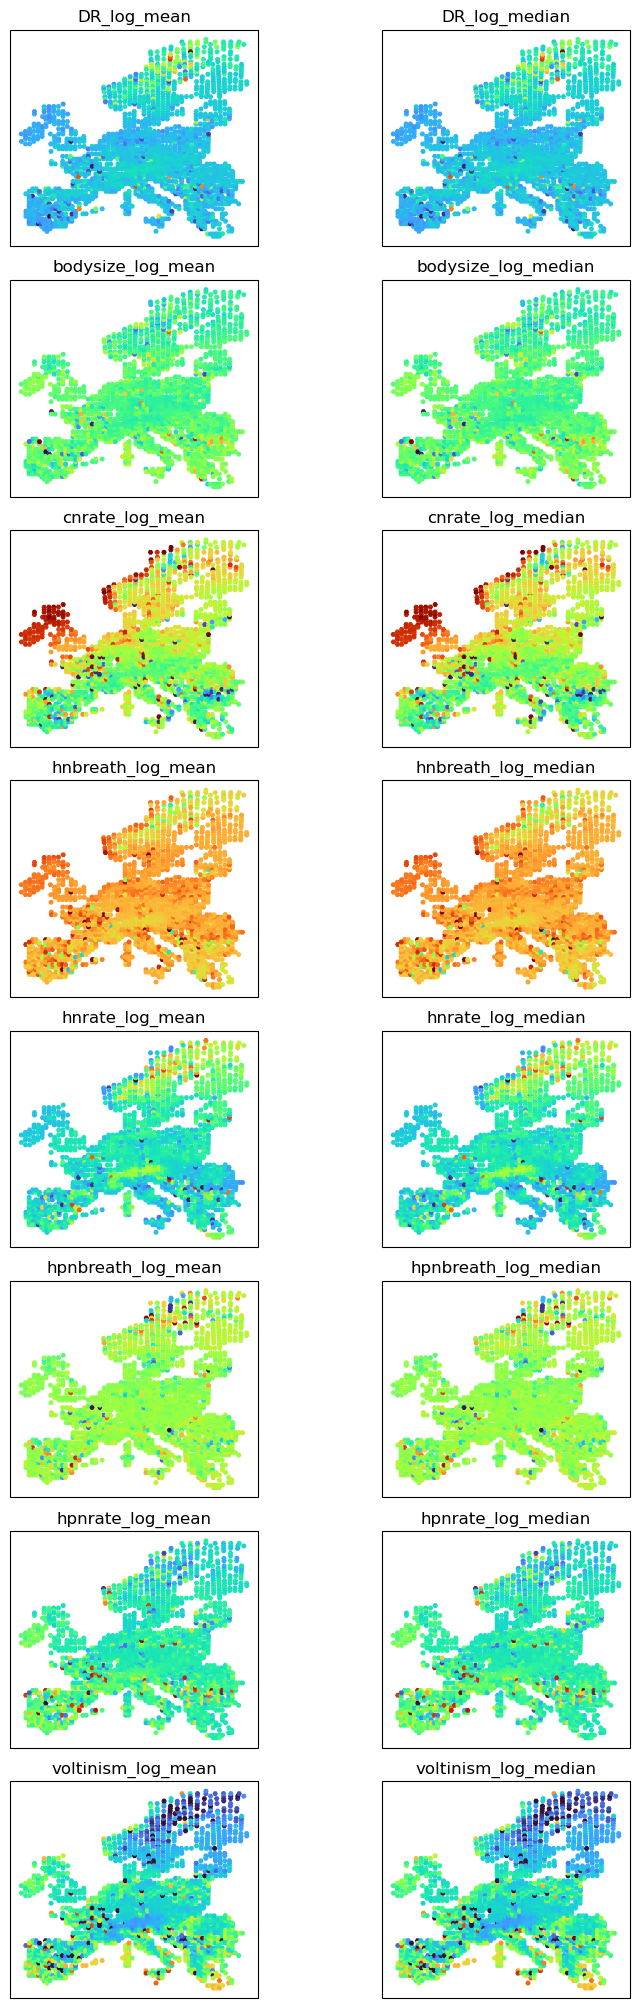

In [67]:
names=['DR_log','bodysize_log','cnrate_log','hnbreath_log','hnrate_log','hpnbreath_log','hpnrate_log','voltinism_log']
markersize=3
cmap = mpl.cm.get_cmap('turbo')

fig=plt.figure(figsize=(8,26),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.00) #row columns

for index,trait in enumerate(names):   
    ax=plt.subplot(outer_grid[index,0], projection=gcrs.LambertAzimuthalEqualArea())# row column
    norm = mpl.colors.Normalize(vmin=aggdf['%s_mean'%(trait)].min(), vmax=aggdf['%s_mean'%(trait)].max())
    ax.scatter(x=aggdf.utmlong, y=aggdf.utmlat, c=[norm(x) for x in aggdf['%s_mean'%(trait)]],cmap = cmap, marker='H', s=8)
    plt.title('%s_mean'%(trait))
    
    ax=plt.subplot(outer_grid[index,1], projection=gcrs.LambertAzimuthalEqualArea())# row column
    norm = mpl.colors.Normalize(vmin=aggdf['%s_median'%(trait)].min(), vmax=aggdf['%s_median'%(trait)].max())
    ax.scatter(x=aggdf.utmlong, y=aggdf.utmlat, c=[norm(x) for x in aggdf['%s_median'%(trait)]],cmap = cmap, marker='H', s=8)
    plt.title('%s_median'%(trait))

plt.show()

**Normalizing across traits: mean of 0 and STD of 1**

In [94]:
from sklearn.preprocessing import StandardScaler
aggdfstnd=aggdf.copy(deep=True)

for var in [x for x in aggdfstnd.columns if x not in ['idutm','utmlong','utmlat','geometry']]:
    scaler=StandardScaler()
    aggdfstnd['%s_stand'%(var)]=scaler.fit_transform(aggdfstnd[var].values.reshape(-1, 1))
    
aggdfstnd.describe()

utmlong       utmlat      DR_mean    DR_median  bodysize_mean  \
count  1925.000000  1925.000000  1925.000000  1925.000000    1916.000000   
mean     12.261943    50.087335     0.176435     0.176435      69.243424   
std      10.300460     8.520188     0.064294     0.064294      14.862346   
min     -10.130000    34.990000     0.026609     0.026609       7.931686   
25%       4.790000    43.130000     0.151977     0.151977      64.238225   
50%      13.580000    48.530000     0.168763     0.168763      69.365332   
75%      20.710000    56.170000     0.183235     0.183235      73.397329   
max      30.530000    70.520000     1.326831     1.326831     357.908968   

       bodysize_median  cnrate_mean  cnrate_median  hnbreath_mean  \
count      1916.000000  1925.000000    1925.000000    1918.000000   
mean         69.243424   603.342234     603.342234       6.535866   
std          14.862346   180.674827     180.674827       0.608435   
min           7.931686   154.812952     154.812952       2.000000   
25%          64.238225   483.526719     483.526719       6.333333   
50%          69.365332   575.066669     575.066669       6.529412   
75%          73.397329   699.418092     699.418092       6.775181   
max         357.908968  1146.304684    1146.304684      12.000000   

       hnbreath_median  ...  hnbreath_mean_stand  hnbreath_median_stand  \
count      1918.000000  ...         1.918000e+03           1.918000e+03   
mean          6.535866  ...        -1.074335e-16          -1.074335e-16   
std           0.608435  ...         1.000261e+00           1.000261e+00   
min           2.000000  ...        -7.456915e+00          -7.456915e+00   
25%           6.333333  ...        -3.329621e-01          -3.329621e-01   
50%           6.529412  ...        -1.061124e-02          -1.061124e-02   
75%           6.775181  ...         3.934308e-01           3.934308e-01   
max          12.000000  ...         8.982977e+00           8.982977e+00   

       hnrate_mean_stand  hnrate_median_stand  hpnbreath_mean_stand  \
count       1.918000e+03         1.918000e+03          1.923000e+03   
mean       -1.096562e-15        -1.096562e-15          7.944186e-17   
std         1.000261e+00         1.000261e+00          1.000260e+00   
min        -3.559098e+00        -3.559098e+00         -3.810490e+00   
25%        -4.625751e-01        -4.625751e-01         -2.849910e-01   
50%        -1.793195e-01        -1.793195e-01          3.033147e-04   
75%         2.591670e-01         2.591670e-01          3.726512e-01   
max         7.346618e+00         7.346618e+00          1.015721e+01   

       hpnbreath_median_stand  hpnrate_mean_stand  hpnrate_median_stand  \
count            1.923000e+03        1.923000e+03          1.923000e+03   
mean             7.944186e-17       -1.200865e-15         -1.200865e-15   
std              1.000260e+00        1.000260e+00          1.000260e+00   
min             -3.810490e+00       -5.548353e+00         -5.548353e+00   
25%             -2.849910e-01       -3.463506e-01         -3.463506e-01   
50%              3.033147e-04       -8.197129e-02         -8.197129e-02   
75%              3.726512e-01        2.330473e-01          2.330473e-01   
max              1.015721e+01        1.024726e+01          1.024726e+01   

       voltinism_mean_stand  voltinism_median_stand  
count          1.916000e+03            1.916000e+03  
mean          -2.892606e-16           -2.892606e-16  
std            1.000261e+00            1.000261e+00  
min           -2.013161e+00           -2.013161e+00  
25%           -5.032834e-01           -5.032834e-01  
50%           -1.024435e-01           -1.024435e-01  
75%            4.483166e-01            4.483166e-01  
max            5.019632e+00            5.019632e+00  

[8 rows x 34 columns]

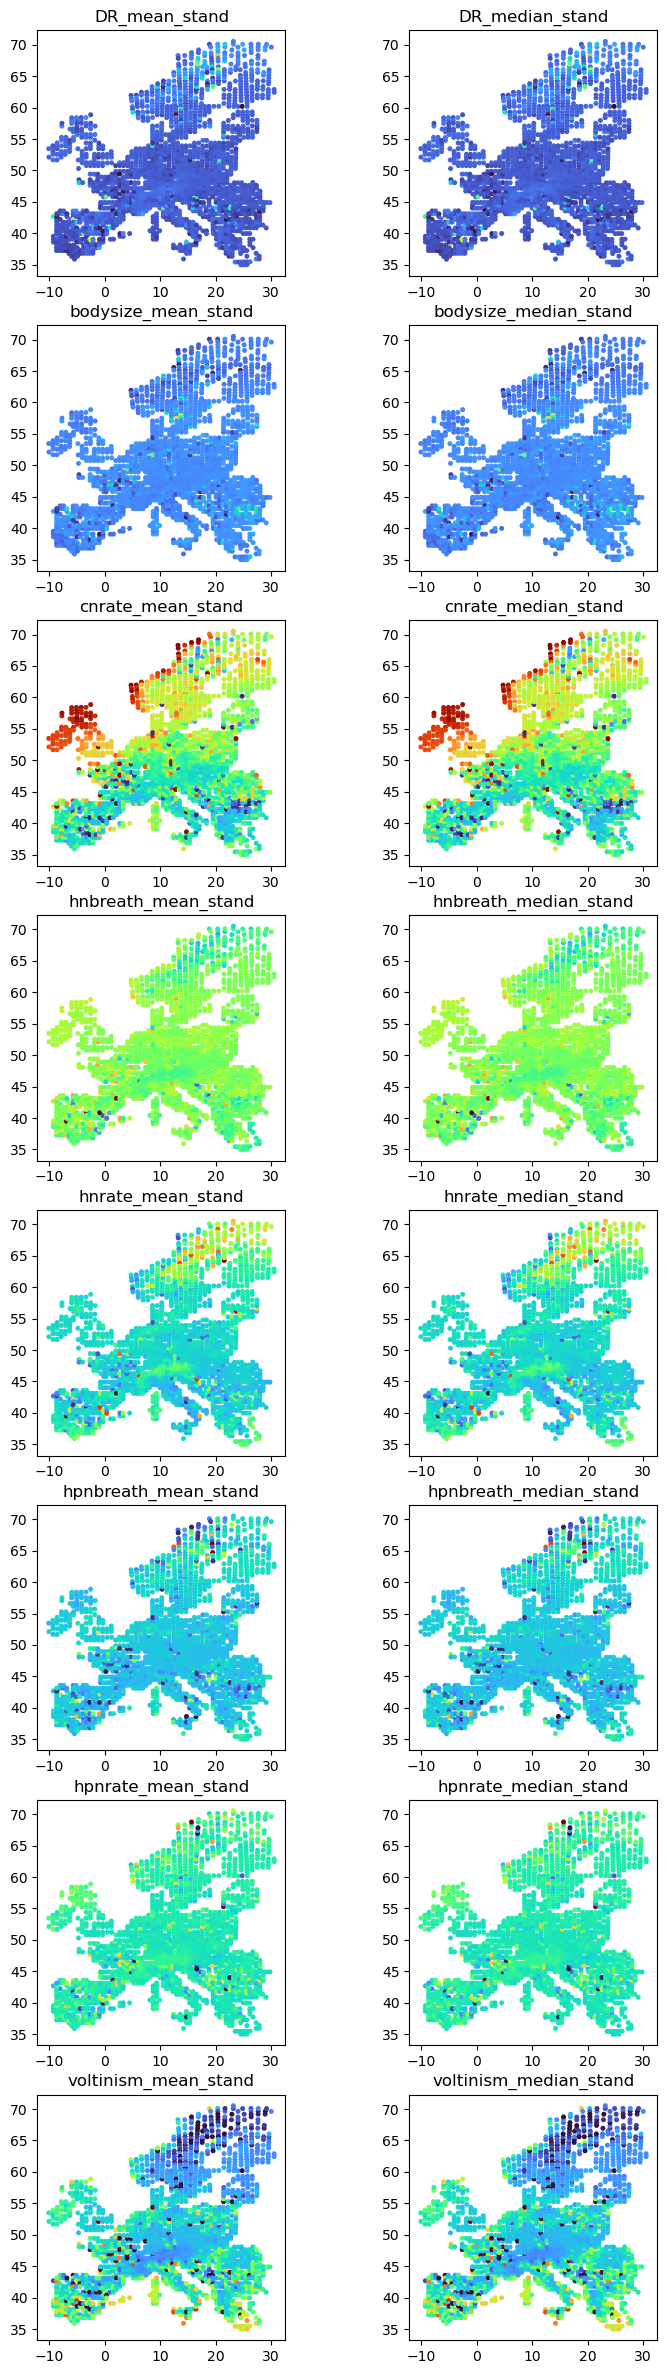

In [98]:
names=['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']
markersize=3
cmap = mpl.cm.get_cmap('turbo')

fig=plt.figure(figsize=(8,30),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.2) #row columns

for index,trait in enumerate(names):
    ax=plt.subplot(outer_grid[index,0])# row column
    norm = mpl.colors.Normalize(vmin=aggdfstnd['%s_mean_stand'%(trait)].min(), vmax=aggdfstnd['%s_mean_stand'%(trait)].max())
    ax.scatter(x=aggdfstnd.utmlong, y=aggdfstnd.utmlat, c=[norm(x) for x in aggdfstnd['%s_mean_stand'%(trait)]],cmap = cmap, marker='H', s=8)
#     ax.set_ylabel('%s_mean_stand'%(trait))
    plt.title('%s_mean_stand'%(trait))

    ax=plt.subplot(outer_grid[index,1])# row column
    norm = mpl.colors.Normalize(vmin=aggdfstnd['%s_median_stand'%(trait)].min(), vmax=aggdfstnd['%s_median_stand'%(trait)].max())
    ax.scatter(x=aggdfstnd.utmlong, y=aggdfstnd.utmlat, c=[norm(x) for x in aggdfstnd['%s_median_stand'%(trait)]],cmap = cmap, marker='H', s=8)
#     ax.set_ylabel('%s_median_stand'%(trait))
    plt.title('%s_median_stand'%(trait))

plt.show()

**Log10 data**

In [72]:
aggdflog10=aggdf.copy(deep=True)

for var in [x for x in aggdflog10.columns if x not in ['idutm','utmlong','utmlat','geometry']]:
    aggdflog10.loc[aggdflog10.index,'%s_log'%(var)]=np.log10(aggdflog10[var])
    
aggdflog10.describe()

utmlong       utmlat      DR_mean    DR_median  bodysize_mean  \
count  1925.000000  1925.000000  1925.000000  1925.000000    1916.000000   
mean     12.261943    50.087335     0.176435     0.176435      69.243424   
std      10.300460     8.520188     0.064294     0.064294      14.862346   
min     -10.130000    34.990000     0.026609     0.026609       7.931686   
25%       4.790000    43.130000     0.151977     0.151977      64.238225   
50%      13.580000    48.530000     0.168763     0.168763      69.365332   
75%      20.710000    56.170000     0.183235     0.183235      73.397329   
max      30.530000    70.520000     1.326831     1.326831     357.908968   

       bodysize_median  cnrate_mean  cnrate_median  hnbreath_mean  \
count      1916.000000  1925.000000    1925.000000    1918.000000   
mean         69.243424   603.342234     603.342234       6.535866   
std          14.862346   180.674827     180.674827       0.608435   
min           7.931686   154.812952     154.812952       2.000000   
25%          64.238225   483.526719     483.526719       6.333333   
50%          69.365332   575.066669     575.066669       6.529412   
75%          73.397329   699.418092     699.418092       6.775181   
max         357.908968  1146.304684    1146.304684      12.000000   

       hnbreath_median  ...  hnbreath_mean_log  hnbreath_median_log  \
count      1918.000000  ...        1918.000000          1918.000000   
mean          6.535866  ...           0.813336             0.813336   
std           0.608435  ...           0.042415             0.042415   
min           2.000000  ...           0.301030             0.301030   
25%           6.333333  ...           0.801632             0.801632   
50%           6.529412  ...           0.814874             0.814874   
75%           6.775181  ...           0.830921             0.830921   
max          12.000000  ...           1.079181             1.079181   

       hnrate_mean_log  hnrate_median_log  hpnbreath_mean_log  \
count      1918.000000        1918.000000         1923.000000   
mean          1.406116           1.406116            1.379252   
std           0.044204           0.044204            0.138130   
min           1.197257           1.197257            0.210502   
25%           1.386143           1.386143            1.364580   
50%           1.399934           1.399934            1.396088   
75%           1.420453           1.420453            1.434047   
max           1.662480           1.662480            1.939095   

       hpnbreath_median_log  hpnrate_mean_log  hpnrate_median_log  \
count           1923.000000       1923.000000         1923.000000   
mean               1.379252          1.786554            1.786554   
std                0.138130          0.019564            0.019564   
min                0.210502          1.661280            1.661280   
25%                1.364580          1.780126            1.780126   
50%                1.396088          1.785379            1.785379   
75%                1.434047          1.791555            1.791555   
max                1.939095          1.952594            1.952594   

       voltinism_mean_log  voltinism_median_log  
count         1916.000000           1916.000000  
mean             0.189723              0.189723  
std              0.077238              0.077238  
min              0.000000              0.000000  
25%              0.155148              0.155148  
50%              0.188471              0.188471  
75%              0.230449              0.230449  
max              0.477121              0.477121  

[8 rows x 34 columns]

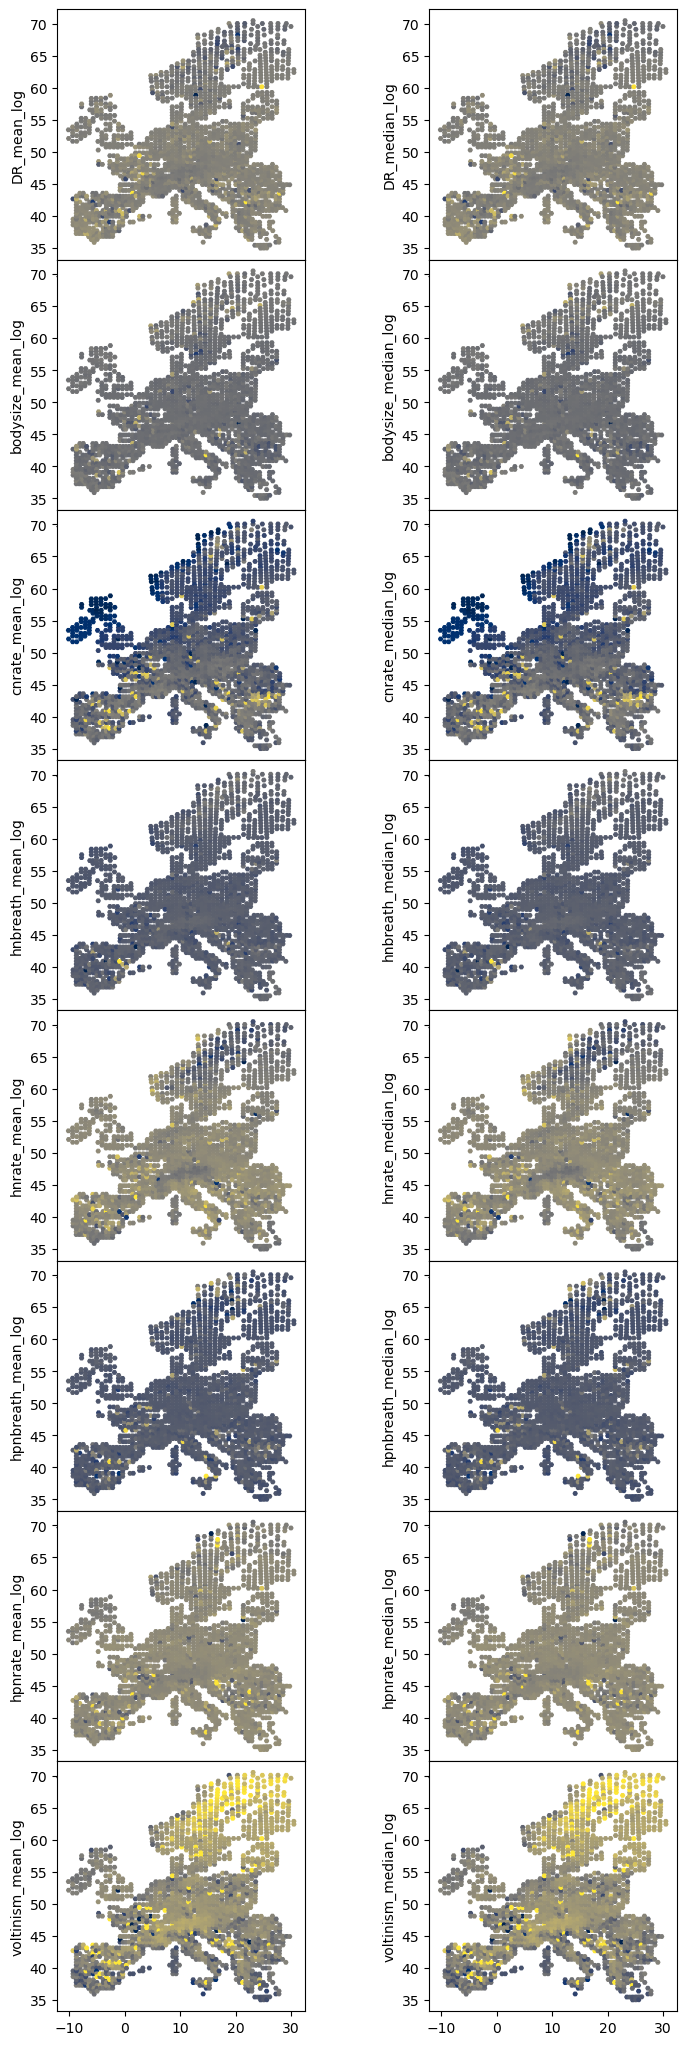

In [73]:
names=['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']
markersize=3
cmap = mpl.cm.get_cmap('cividis_r')

fig=plt.figure(figsize=(8,26),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.00) #row columns

for index,trait in enumerate(names):
    ax=plt.subplot(outer_grid[index,0])# row column
    norm = mpl.colors.Normalize(vmin=aggdflog10['%s_mean_log'%(trait)].min(), vmax=aggdflog10['%s_mean_log'%(trait)].max())
    ax.scatter(x=aggdflog10.utmlong, y=aggdflog10.utmlat, c=[norm(x) for x in aggdflog10['%s_mean_log'%(trait)]],cmap = cmap, marker='H', s=8)
    ax.set_ylabel('%s_mean_log'%(trait))
    
    ax=plt.subplot(outer_grid[index,1])# row column
    norm = mpl.colors.Normalize(vmin=aggdflog10['%s_median_log'%(trait)].min(), vmax=aggdflog10['%s_median_log'%(trait)].max())
    ax.scatter(x=aggdflog10.utmlong, y=aggdflog10.utmlat, c=[norm(x) for x in aggdflog10['%s_median_log'%(trait)]],cmap = cmap, marker='H', s=8)
    ax.set_ylabel('%s_median_log'%(trait))

plt.show()

# 5. KDE from traits 

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)
/tmp/ipykernel_14240/455731513.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(outer_grid[ii,0], projection=gcrs.WebMercator()))
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your 

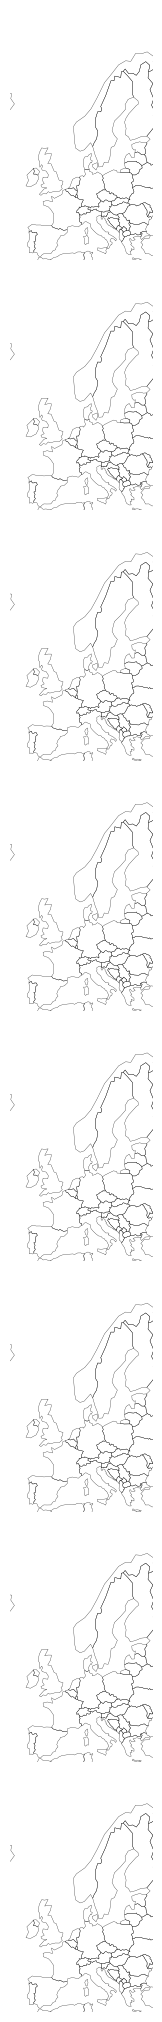

In [52]:
# import warnings
# warnings.filterwarnings('ignore')

names=['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']
markersize=3
cmap = mpl.cm.get_cmap('cividis_r')

fig=plt.figure(figsize=(6,26),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.00) #row columns

for ii,trait in enumerate(names):
#     norm = mpl.colors.Normalize(vmin=aggdf['%s_median'%(trait)].min(), vmax=aggdf['%s_median'%(trait)].max())
    gplt.kdeplot(aggdf[['%s_mean'%(trait),'geometry']],
                shade=True, cmap = cmap, #c=[norm(x) for x in coords['%s_mean'%(trait)]],
                projection=gcrs.WebMercator(), clip=world, n_levels=30, linewidth=0.2, fill=False, bw_adjust=.2,
                extent=(-15, 35, 30, 75), cbar=True,
                ax=plt.subplot(outer_grid[ii,0], projection=gcrs.WebMercator())) # WebMercator
    gplt.polyplot(world, zorder=1,linewidth=0.2,extent=(-15, 35, 30, 75),
                ax=plt.subplot(outer_grid[ii,0], projection=gcrs.WebMercator()))

plt.show()


/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

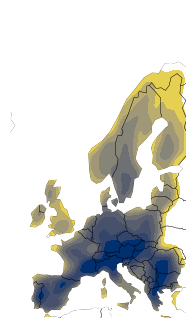

In [76]:
# import warnings
# warnings.filterwarnings('ignore')

markersize=3
trait='voltinism'
ax = gplt.kdeplot(aggdf[['%s_mean'%(trait),'geometry']], #clip=world.geometry,
             shade=True, cmap='cividis_r',figsize=(4, 4),
             projection=gcrs.WebMercator(), clip=world, bw_adjust=0.4, linewidth=0.2, fill=True,
             extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

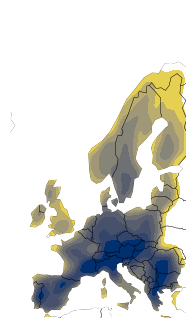

In [77]:
# import warnings
# warnings.filterwarnings('ignore')

markersize=3
trait='bodysize'
ax = gplt.kdeplot(aggdf[['%s_mean'%(trait),'geometry']], #clip=world.geometry,
             shade=True, cmap='cividis_r',figsize=(4, 4),
             projection=gcrs.WebMercator(), clip=world, bw_adjust=0.4, linewidth=0.2, fill=True,
             extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)
/home/mftorres27/anaconda3/envs/geoplot/

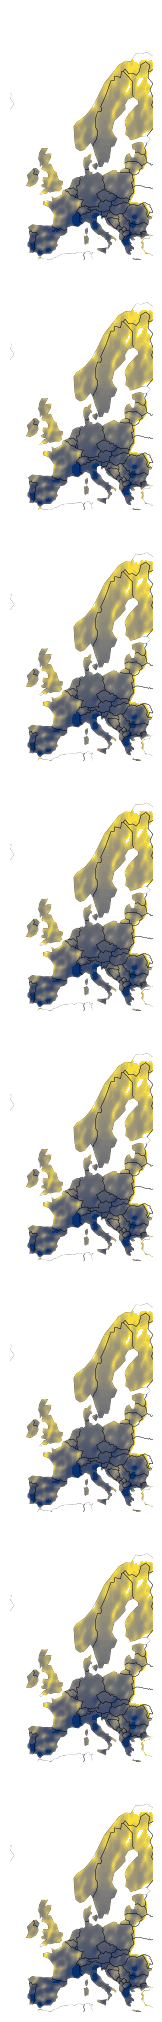

In [48]:
# import warnings
# warnings.filterwarnings('ignore')

names=['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']
markersize=3
cmap = mpl.cm.get_cmap('cividis_r')

fig=plt.figure(figsize=(6,26),facecolor='w') #width height
outer_grid=gridspec.GridSpec(len(names),2, wspace=0.5, hspace=0.00) #row columns

for index,trait in enumerate(names):
#     ax = plt.subplot(outer_grid[index,0], projection=gcrs.WebMercator())
    norm = mpl.colors.Normalize(vmin=aggdf['%s_median'%(trait)].min(), vmax=aggdf['%s_median'%(trait)].max())
    gplt.kdeplot(aggdf[['%s_mean'%(trait),'geometry']],
                shade=True, cmap = cmap, #c=[norm(x) for x in coords['%s_mean'%(trait)]],
                projection=gcrs.WebMercator(), clip=world, n_levels=30, linewidth=0.2, fill=False, bw_adjust=.2,
#                 hue=coords['%s_mean'%(trait)],
#                 hue_norm=(coords['%s_median'%(trait)].min(),coords['%s_median'%(trait)].max()),
                extent=(-15, 35, 30, 75),
                ax=plt.subplot(outer_grid[index,0], projection=gcrs.WebMercator())) # WebMercator
    gplt.polyplot(world, zorder=1,linewidth=0.2,extent=(-15, 35, 30, 75),
                ax=plt.subplot(outer_grid[index,0], projection=gcrs.WebMercator()))
#     ax.set_ylabel('%s_mean'%(trait))

#     ax = plt.subplot(outer_grid[index,1], projection=gcrs.WebMercator())
#     gplt.kdeplot(coords[['%s_median'%(trait),'geometry']],
#                 shade=True, cmap = cmap, #c=[norm(x) for x in coords['%s_mean'%(trait)]],
#                 projection=gcrs.WebMercator(), clip=world, n_levels=10, linewidth=0.2, fill=True, #bw_adjust=.5
#                 extent=(-15, 35, 30, 75),
#                 ax=plt.subplot(outer_grid[index,1], projection=gcrs.WebMercator())) # WebMercator
#     gplt.polyplot(world, zorder=1,linewidth=0.2,extent=(-15, 35, 30, 75),
#                 ax=plt.subplot(outer_grid[index,1], projection=gcrs.WebMercator()))
#     ax.set_ylabel('%s_median'%(trait))
    
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

names=['DR','bodysize','cnrate','hnbreath','hnrate','hpnbreath','hpnrate','voltinism']
markersize=3

coords=utmcoords.copy(deep=True)

# iterate through species, each is a column
for col in [x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]:
    try:
        # filter the rows for which the species is present in every UTM cell
        # and replace presence (1) with the value for that species/trait
        value = alltraits.loc[alltraits[alltraits['mapspecies'] == col].index,trait].values[0]
#             print(value)
        coords.loc[coords[coords[col] == 1].index,col] = value
    except:
#         print('%s might not be in the trait data'%(col))
        coords.loc[coords[coords[col] == 1].index,col] = 0
coords['%s_mean'%(trait)]=coords[[x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].mean(axis=1)
coords['%s_median'%(trait)]=coords[[x for x in coords.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].median(axis=1)
ax=''
#     print(coords[['%s_mean'%(trait),'%s_median'%(trait)]].describe())
#     print('%s_mean'%(trait))
ax = gplt.kdeplot(coords[['%s_mean'%(trait),'geometry']], #clip=world.geometry,
shade=True, cmap='viridis',figsize=(4, 4),
projection=gcrs.WebMercator(), clip=world, bw_adjust=.1, linewidth=0.2, fill=True,
             extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

#     print('%s_median'%(trait))
# ax1=gplt.kdeplot(coords[['%s_median'%(trait),'geometry']], #clip=world.geometry,
# shade=True, cmap='viridis',figsize=(4, 4),
# projection=gcrs.WebMercator(), clip=world, bw_adjust=.1, linewidth=0.2, fill=True,
#              extent=(-15, 35, 30, 75)) # WebMercator
# gplt.polyplot(world, ax=ax1, zorder=1,linewidth=0.2,extent=(-15, 35, 30, 75))


# 6. Checking projections

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

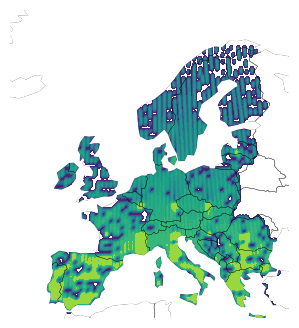

In [80]:
ax = gplt.kdeplot(aggdf[['DR_mean','geometry']], #clip=world.geometry,
    shade=True, cmap='viridis',figsize=(4, 4),
    projection=gcrs.EckertI(), clip=world, bw_adjust=.1, linewidth=0, fill=True,
                 extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

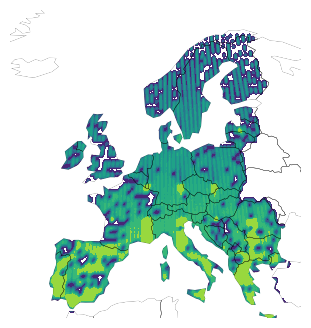

In [81]:
ax = gplt.kdeplot(aggdf[['DR_mean','geometry']], #clip=world.geometry,
    shade=True, cmap='viridis',figsize=(4, 4),
    projection=gcrs.EckertVI(), clip=world, bw_adjust=.1, linewidth=0, fill=True,
                 extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

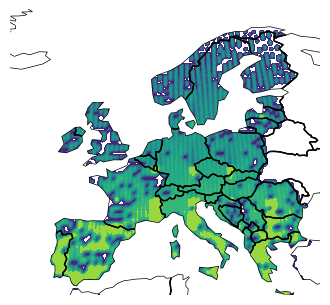

In [82]:
ax = gplt.kdeplot(aggdf[['DR_mean','geometry']], #clip=world.geometry,
    shade=True, cmap='viridis',figsize=(4, 4),
    projection=gcrs.EqualEarth(), clip=world, bw_adjust=.1, linewidth=0.2, fill=True,
                 extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

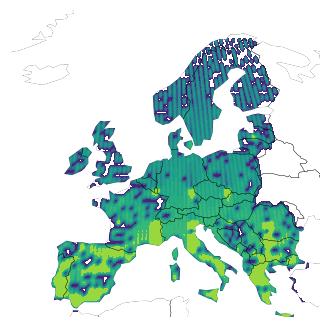

In [83]:
ax = gplt.kdeplot(aggdf[['DR_mean','geometry']], #clip=world.geometry,
    shade=True, cmap='viridis',figsize=(4, 4),
    projection=gcrs.Mollweide(), clip=world, bw_adjust=.1, linewidth=0, fill=True,
                 extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

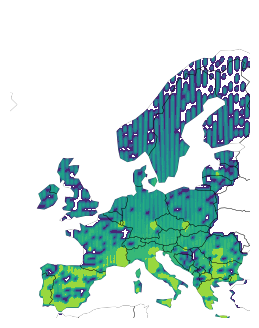

In [85]:
ax = gplt.kdeplot(aggdf[['DR_mean','geometry']], #clip=world.geometry,
    shade=True, cmap='viridis',figsize=(4, 4),
    projection=gcrs.Miller(), clip=world, bw_adjust=.1, linewidth=0, fill=True,
                 extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75))

/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mftorres27/anaconda3/envs/geoplot/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contourf(*args, **kwargs)


<GeoAxesSubplot: >

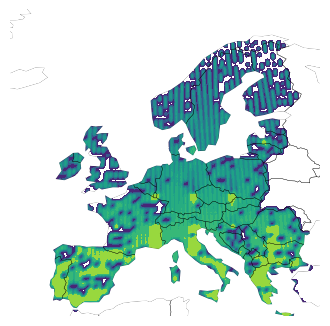

In [86]:
ax = gplt.kdeplot(aggdf[['DR_mean','geometry']], #clip=world.geometry,
    shade=True, cmap='viridis',figsize=(4, 4),
    projection=gcrs.Robinson(), clip=world, bw_adjust=.1, linewidth=0, fill=True,
    extent=(-15, 35, 30, 75)) # WebMercator
gplt.polyplot(world, ax=ax, zorder=1, linewidth=0.2,extent=(-15, 35, 30, 75)) # figsize=(4, 4),


In [87]:
import shapely.geometry
# from descartes import PolygonPatch

# total area for the grid
xmin, ymin, xmax, ymax= aggdf.total_bounds
print(xmin, ymin, xmax, ymax)
print(xmax-xmin)
print(ymax-ymin)

n_cells=100
cell_size = (xmax-xmin)/n_cells
print(cell_size)

crs=aggdf.crs

grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

-10.13 34.99 30.53 70.52
40.660000000000004
35.529999999999994
0.4066


(-12.163, 32.563, 33.2135, 72.2965)

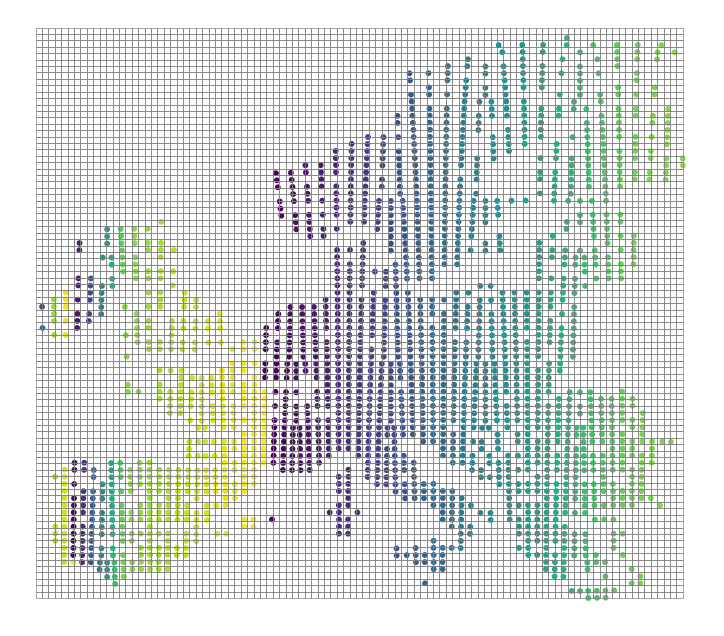

In [88]:
ax = aggdf.plot(markersize=10, figsize=(12, 8), cmap='viridis')#, column='meanDR')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey', lw=0.5)
ax.axis("off")

/home/mftorres27/anaconda3/envs/rasterio/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/home/mftorres27/anaconda3/envs/rasterio/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


(-12.162999999999997, 32.56299999999991, 33.200960000000016, 72.55983999999977)

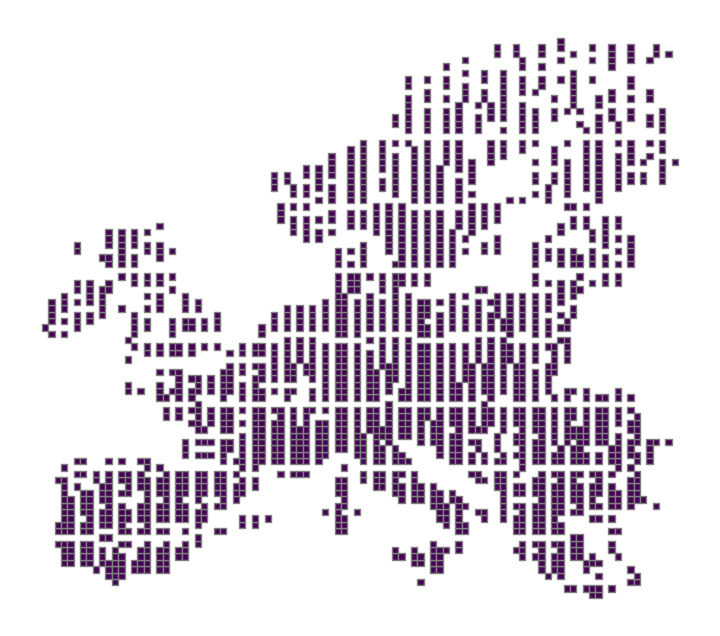

In [17]:
merged = gpd.sjoin(aggdf, cell, how='left', op='within')
merged
# make a simple count variable that we can sum
# aggdf[[x for x in aggdf.columns if x not in ['idutm','utmlong','utmlat','utmx','utmy','geometry']]].mean(axis=1)

aggdf['DRtest']='0'
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by='index_right', aggfunc='first')
# put this into cell
cell.loc[dissolve.index, 'DRtest'] = dissolve.DRtest.values

ax = cell.plot(column='DRtest', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")
plt.autoscale(False)
ax.axis('off')